In [2]:
import yfinance as yf
import numpy as np
from math import sqrt, log
import matplotlib.pyplot as plt
from time import time

data = yf.download("KO")


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1962-01-02  0.263021  0.270182  0.263021  0.263021   0.049664   806400
1962-01-03  0.259115  0.259115  0.253255  0.257161   0.048557  1574400
1962-01-04  0.257813  0.261068  0.257813  0.259115   0.048926   844800
1962-01-05  0.259115  0.262370  0.252604  0.253255   0.047820  1420800
1962-01-08  0.251302  0.251302  0.245768  0.250651   0.047328  2035200
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-01-19  59.730000  60.639999  59.709999  59.720001  59.720001  14894500
2023-01-20  59.720001  60.090000  59.400002  60.080002  60.080002  14226400
2023-01-23  60.279999  60.570000  60.049999  60.230000  60.230000  12613400
2023-01-24  60.080002  63.259998  59.799999  60.549999

In [3]:
stockGrowth= np.array((data["Close"]-data["Open"]).to_numpy())
growth_data=stockGrowth/data["Open"]+1

mean=np.mean(growth_data)
stdev=np.std(growth_data)


In [4]:
def uniform_generator(prev: int)->int: #return is in interval [0,2**32]
    mod=2 ** 32
    a=1103515245
    b=12345
    return(a*prev+b)%mod

In [5]:
def hastings_approx(u:float)->int:
    c0=2.515517
    c1=0.802853
    c2=0.010328
    d1=1.432788
    d2=0.189269
    d3=0.001308
    Hz=np.float64(1-u)
    if Hz > 0.5:
        H=np.float64(1-Hz)
    else:
        H=np.float64(Hz)
    
    t=sqrt(np.log(1/(H*H)))
    k=t-(c0+c1*t+c2*t*t)/(1+d1*t+d2*t*t+ d3*t*t*t)
    if Hz > 0.5:
        k=-k
    return k      

In [6]:
def generate_simulation(days:int)->list:
    random=uniform_generator(time())
    prediction_list=[]
    for i in range(days):
        z=hastings_approx(random/2 ** 32)
        prediction_list.append(z*stdev+mean)
        random=uniform_generator(random)
    
    stock_price=data["Close"][-1]
    predicted_price=[]
    for i in range(len(prediction_list)):
        predicted_price.append(stock_price)
        stock_price=stock_price*prediction_list[i]
    return predicted_price


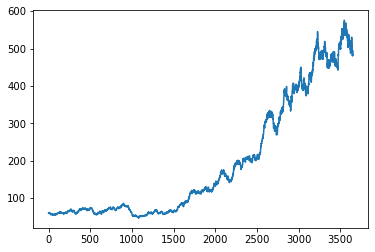

In [7]:
plt.plot(generate_simulation(365*10))
plt.show()

In [8]:
def generate_multiple_simulations(simulations:int, days:int)-> list:
    simulation_list=[]
    for i in range(simulations):
        simulation_list.append(generate_simulation(days))
    return simulation_list

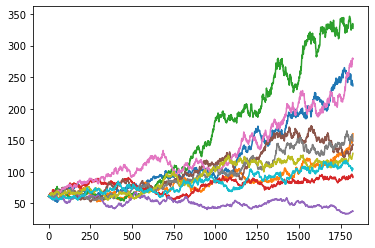

In [14]:
for el in generate_multiple_simulations(10, 365*5):
    plt.plot(el)
plt.show()